# Final project:

## Hand in instructions:

This project is meant to be done by groups. Needless to say, everyone is expected to collaborate and try to create synergies among the different parts of the mini-project.

Original answers are expected.

You will need to upload a pdf with your final report to google class by the due date. Please, only one memeber of the group uploads the pdf and all the members' names are clearly indicated.

Additionaly, upload the project to your github with all the steps we saw in class. 


## Requirements:

We want to understand and model disease spread focusing on the COVID epidemic. We will first make ose of the COVID19_state.csv dataset to explore the real world data and then simulate a simple contagion model. All the questions below should be hand in in a report-like fashion (remember, this aims to be a project not a problem set). Include all the necesary figures and explanations to make the report explanatory.

This project simulates an hypothetical policy analysis so we, the policy makers, are interested on the following :

- How has been the evolution on the number of cases over time?
- Do tests seem to have some effect?
- What are the subgroups that suffered most?
- If we were to do confinement measures by subgroups of populations, on which groups should we focus to stop the contagion early? 


## Model:

In order to study beforehand the evolution of pandemics, epidemiodiologist model contagion mathematically. We will now simulate with python a simple model of contagion.

- There is a total population of 1000 people. Each one can infect 3 other individuals per day with a probability of 0.05 (let's assume that they are totally independent). There are 10 persons initially infected. 

Simulate and plot the number of infected persons in the next 3 days.

- How many days will it take for the full population to be infected?
- Let's simulate a policy. Suposse we introduce vaccination at period 3. The implications of the vaccine are only for those that are still uninfected. For simplicity, their inmunity is modeled as a reduction in the probability that they get infected of 0.01 pp. How many infections result in the 10th day? 



In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def daily_infection(starting_infected: int, infection_probability: float, max_infections: int = 3) -> int:
    """Models daily infection

    Args:
        starting_infected (int): Number of people initially infected
        infection_probability (float): Probability of infection
        max_infections (int): Maximum number of people a person can infect

    Returns:
        int: Total number of people infected at the end of the day
    """
    
    extra_infected = 0
    for infected_person in list(range(0, starting_infected)):
        encounter = 0
        while encounter < max_infections:
            if random.random() < infection_probability:
                extra_infected += 1
            encounter += 1
    return extra_infected + starting_infected

In [3]:
def infection_model(number_days: int, starting_infected: int, infection_probability: float) -> pd.DataFrame:
    """Models disease spread over multiple days

    Args:
        number_days (int): Number of days to model over
        starting_infected (int): Number of people initially infected
        infection_probability (float): Probability of infection

    Returns:
        pd.DataFrame: Dataframe with number of infected people on each day
    """
    
    infected_df = pd.DataFrame(
        {'Day': [0],
         'Infected': [starting_infected]}
    )
    
    for day in list(range(1, number_days+1)):
        day_infection = daily_infection(infected_df['Infected'][len(infected_df)-1], infection_probability)
        day_reading = {'Day': day, 'Infected': day_infection}
        infected_df.loc[len(infected_df)] = day_reading
        
    return infected_df


In [4]:
def full_pop_infected(population: int, starting_infected: int, infection_probability: float) -> pd.DataFrame:
    """Models the length of time for a full population to become infected

    Args:
        population (int): Total population
        starting_infected (int): Number of people initially infected
        infection_probability (float): Probability of infection

    Returns:
        pd.DataFrame: Dataframe with number of infected people on each day
    """
    
    infected_df = pd.DataFrame(
        {'Day': [0],
         'Infected': [starting_infected]}
    )
    
    day = 1
    
    while infected_df['Infected'][len(infected_df)-1] < population:
        day_infection = daily_infection(infected_df['Infected'][len(infected_df)-1], infection_probability)
        if day_infection < population:
            day_reading = {'Day': day, 'Infected': day_infection}
        else:
            day_reading = {'Day': day, 'Infected': population}
        infected_df.loc[len(infected_df)] = day_reading
        day += 1
    
    print('Model estimates ' + str(day) + ' days until the full population is infected.')
    
    return infected_df


In [5]:
def vaccine_introduction(starting_infected: int, vaccine_day: int, vaccine_effectiveness: float,
                        number_days: int, infection_probability: float) -> pd.DataFrame:
    """Models the introduction of a vaccine

    Args:
        starting_infected (int): Number of people initially infected
        vaccine_day (int): Day vaccine is introduced
        vaccine_effectiveness (float): Amount vaccine reduces infection probability by
        number_days (int): Number of days to model over
        infection_probability (float): Probability of infection

    Returns:
        pd.DataFrame: Dataframe with number of infected people on each day
    """
    infected_df = pd.DataFrame(
        {'Day': [0],
         'Infected': [starting_infected]}
    )
    
    day = 1  
    for day in list(range(1, number_days+1)):
        if day < vaccine_day:
            day_infection = daily_infection(infected_df['Infected'][len(infected_df)-1], infection_probability)
        else:
            day_infection = daily_infection(infected_df['Infected'][len(infected_df)-1], infection_probability-vaccine_effectiveness)
        
        day_reading = {'Day': day, 'Infected': day_infection}
        infected_df.loc[len(infected_df)] = day_reading
        day += 1
    
      
    print("With a vaccine on day " + str(vaccine_day) + " the model estimates there will be " +\
        str(infected_df['Infected'][len(infected_df)-1]) + " people infected on day " + str(number_days))
        
    return infected_df


In [6]:
def plot_pandemic(df: pd.DataFrame, infected_col: str, vaccine_day: int = None) -> None:
    """Plots the development of a pandemic

    Args:
        df (pd.DataFrame): Dataframe with information on the number of people infected on each day
        infected_col (str): Column containing infected data
        vaccine_day (int, optional): Day of vaccine introduction. Defaults to None.
    """
    fig, ax = plt.subplots()
    ax.plot(df[infected_col])
    ax.set_xlabel('Days')
    ax.set_ylabel('Number of infected')
    ax.set_title('Disease transmission')
    
    if vaccine_day:
        ax.axvline(x=vaccine_day, color='green', linestyle='--', label='Vaccine introduction')
        plt.legend()
    
    plt.show()



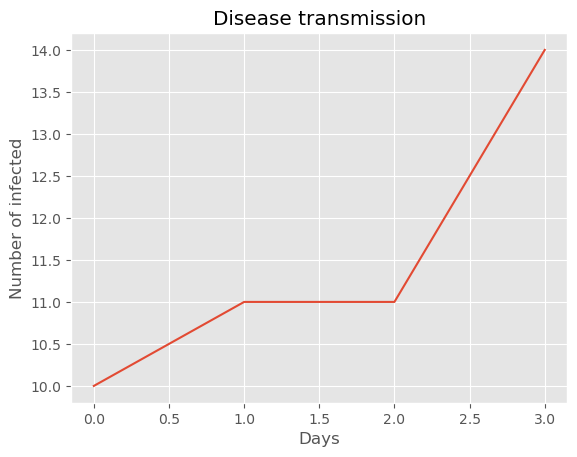

In [7]:
# Simulation over 3 days
three_day_sim = infection_model(3, 10, 0.05)
plot_pandemic(three_day_sim, 'Infected')

Model estimates 35 days until the full population is infected.


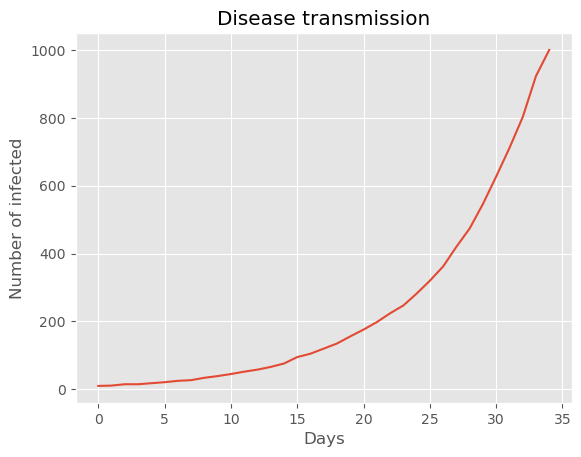

In [8]:
# How long for full pop to be infected?
full_pop_sim = full_pop_infected(1000, 10, 0.05)
plot_pandemic(full_pop_sim, 'Infected')

With a vaccine on day 3 the model estimates there will be 22 people infected on day 10


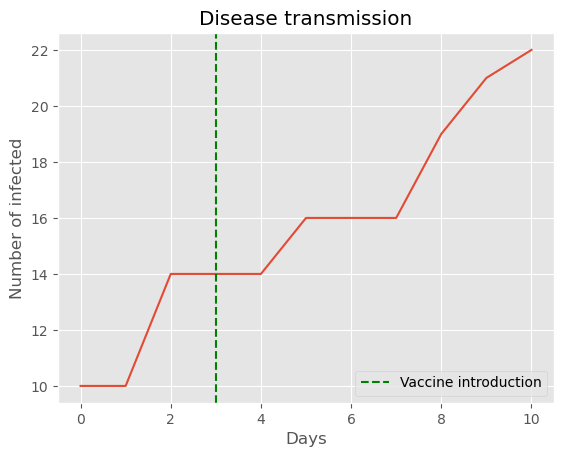

In [9]:
# Vaccine introduction
vaccine_sim = vaccine_introduction(10, 3, 0.01, 10, 0.05)
plot_pandemic(vaccine_sim, 'Infected', 3)